## Introduction

## Loading data

### loading principal package 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### loading original building file : overview all dataset 

In [3]:
df = pd.read_excel('EPC_Public.xlsx', sheetname='no_error')
df.head()

,EPC_ID,Organization_Name,Public_Building_Type,Public_Building_Category,Construction_Year,Refurbishment_Year,Building_Age,Useful_Floor_Area [m2],EPC_Score,Energy_Carrier_Electricity,...,ONDERWIJS_AANTAL_LLN,ONDERWIJS_AANTAL_M2_SPORTHAL,ONDERWIJS_AANTAL_M2_ZWEMBAD,ONDERWIJS_AANTAL_MAALTIJDEN,OPVANG_AANTAL_KINDEREN,RUSTHUIS_AANTAL_BEDDEN,RUSTHUIS_SERVICEFLATS,ZIEKENHUIS_AANTAL_BEDDEN,ZWEMBAD_WATEROPPERVLAKTE,ZWEMBAD_SUBTROPISCH
0,2,Vrije Basisschool VIEJOOL,primary school,eductional buildings,1953,NaN,66,1278.00,165.87,electricity,...,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,BuBaO De Berkjes,primary school,eductional buildings,1997,NaN,22,1088.05,120.70,electricity,...,44.0,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,Vlerick,higher education and universities,eductional buildings,1920,2005.0,99,11178.00,409.14,electricity,...,5225.0,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN
3,22,Vlerick Leuven,higher education and universities,eductional buildings,1920,2005.0,99,4457.00,392.77,electricity,...,2075.0,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN
4,42,Sint-Jozefsinstituut,secondary school,eductional buildings,1946,2000.0,73,18424.10,123.78,electricity,...,1659.0,948.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN


The variable 'Building_Age','Useful_Floor_Area' and 'EPC_Score' are important to the simulate future. 
so the analysis is mainly around these varaibles. 

Firstly, we want to get the clustering for dataset in each 'public_building_category'
secondly, we want to try also the clustering of dataset in each 'public_building_type' .
and then idealy, we want to construct the model for the public_building_categrory. 


Let's start with extract the data for the public_building_category. 

In [4]:
data_use_o = df.loc[:,['EPC_ID','Public_Building_Type','Public_Building_Category','Building_Age','Useful_Floor_Area [m2]','EPC_Score']]
data_use_o.head()


,EPC_ID,Public_Building_Type,Public_Building_Category,Building_Age,Useful_Floor_Area [m2],EPC_Score
0,2,primary school,eductional buildings,66,1278.00,165.87
1,5,primary school,eductional buildings,22,1088.05,120.70
2,21,higher education and universities,eductional buildings,99,11178.00,409.14
3,22,higher education and universities,eductional buildings,99,4457.00,392.77
4,42,secondary school,eductional buildings,73,18424.10,123.78


some description about the useful data

In [5]:
data_use_o.describe()
data_use_o.describe(include='all').loc['unique', :]

EPC_ID                      NaN
Public_Building_Type         21
Public_Building_Category      6
Building_Age                NaN
Useful_Floor_Area [m2]      NaN
EPC_Score                   NaN
Name: unique, dtype: object

### extract the original 'type' data 

In [15]:
data_selected = data_use_o.loc[data_use_o['Public_Building_Type']=='prime school',['Building_Age','Useful_Floor_Area [m2]','EPC_Score']]
data_selected.head()

,Building_Age,Useful_Floor_Area [m2],EPC_Score


### extract the original 'category' data 

extract the educational buildings data from original category data 

In [32]:
data_selected = data_use_o.loc[data_use_o['Public_Building_Category']=='public service buildings',['Building_Age','Useful_Floor_Area [m2]','EPC_Score']]
data_selected.head()
#sports buildings,office buildings,educational buildings,
#cultural buildings,healthcare buildings(4),public service buildings(2)

,Building_Age,Useful_Floor_Area [m2],EPC_Score
11,114,24938.0,372.05
87,41,2825.0,206.26
88,169,5035.0,276.81
90,119,1733.0,126.14
91,32,544.0,160.57


In [33]:
data_selected.count()


Building_Age              472
Useful_Floor_Area [m2]    472
EPC_Score                 472
dtype: int64

### data for model

In [34]:
data_for_model_o = data_selected

let's see the distribution of each variable just for the category education buildings from original data

In [35]:
data_for_model_o.describe()

,Building_Age,Useful_Floor_Area [m2],EPC_Score
count,472.000000,472.000000,472.000000
mean,53.894068,1788.182182,319.603411
std,50.143334,4074.425997,145.819993
min,7.000000,98.000000,88.720000
25%,27.000000,405.000000,227.097500
50%,41.000000,743.500000,292.805000
75%,59.000000,1639.750000,367.037500
max,545.000000,44847.000000,1202.360000


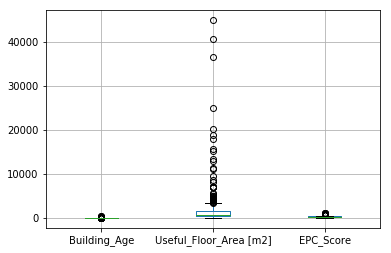

In [36]:
#pd.options.display.mpl_style = 'default'
data_for_model_o.boxplot()
#plt.title("Education building original data")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1175d9978>,
      dtype=object)

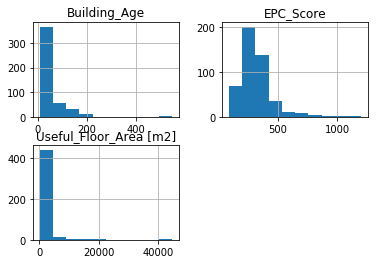

In [37]:
data_for_model_o.hist()

### standard data processing

let's stardalize the data and see the result below 

In [38]:
from sklearn import preprocessing
data_for_model_norm = pd.DataFrame(preprocessing.scale(data_for_model_o))
#data_o_category_edu_norm = (data_o_category_edu - data_o_category_edu.min()) / (data_o_category_edu.max() - data_o_category_edu.min())
data_for_model_norm.columns = data_for_model_o.columns  + '_norm'
data_for_model_norm.head()
data_for_model_norm.describe()

,Building_Age_norm,Useful_Floor_Area [m2]_norm,EPC_Score_norm
count,4.720000e+02,4.720000e+02,4.720000e+02
mean,1.093758e-16,-4.463238e-17,-1.011432e-16
std,1.001061e+00,1.001061e+00,1.001061e+00
min,-9.361927e-01,-4.152672e-01,-1.585025e+00
25%,-5.369129e-01,-3.398392e-01,-6.350574e-01
50%,-2.574170e-01,-2.566719e-01,-1.839723e-01
75%,1.019348e-01,-3.646886e-02,3.256372e-01
max,9.804434e+00,1.057928e+01,6.060165e+00


Another method for standardizing data from sklearn

In [39]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
data_for_model_norm2 = pd.DataFrame(StandardScaler().fit_transform(data_for_model_o.values))
data_for_model_norm2.columns = data_for_model_o.columns  + '_norm2'
data_for_model_norm.head()

,Building_Age_norm,Useful_Floor_Area [m2]_norm,EPC_Score_norm
0,1.199954,5.687766,0.360048
1,-0.257417,0.254740,-0.778108
2,2.297974,0.797723,-0.293779
3,1.299774,-0.013558,-1.328135
4,-0.437093,-0.305688,-1.091772


In [40]:
data_for_model_norm.describe()

,Building_Age_norm,Useful_Floor_Area [m2]_norm,EPC_Score_norm
count,4.720000e+02,4.720000e+02,4.720000e+02
mean,1.093758e-16,-4.463238e-17,-1.011432e-16
std,1.001061e+00,1.001061e+00,1.001061e+00
min,-9.361927e-01,-4.152672e-01,-1.585025e+00
25%,-5.369129e-01,-3.398392e-01,-6.350574e-01
50%,-2.574170e-01,-2.566719e-01,-1.839723e-01
75%,1.019348e-01,-3.646886e-02,3.256372e-01
max,9.804434e+00,1.057928e+01,6.060165e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1120f8dd8>,
      dtype=object)

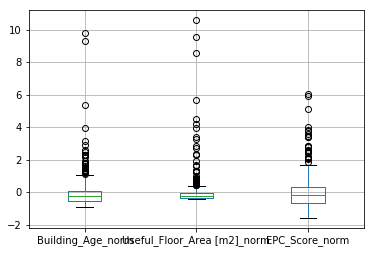

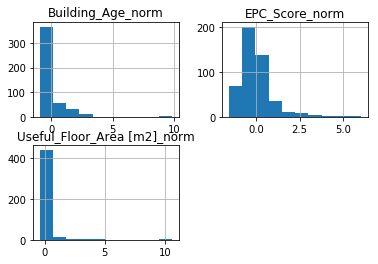

In [41]:
data_for_model_norm.boxplot()
#plt.title("Education building standard data")
data_for_model_norm.hist()

#### comparison the outlier of original data and standard data 

Text(0.5,1,'Building_Age_norm')

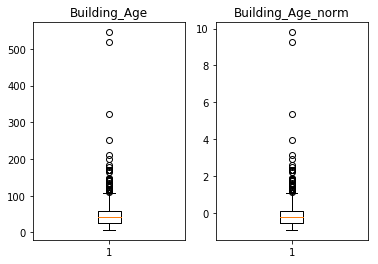

In [42]:
age1 = data_for_model_o.iloc[:,0]
age2 = data_for_model_norm.iloc[:,0]

#plt.boxplot(age2)
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(age1)
axs[0].set_title(age1.name)
axs[1].boxplot(age2)
axs[1].set_title(age2.name)

we can find drectly the values in before and after boxplot are the same distribution. so let's processing the outlier values based on the boxplot.

#### what's boxplot?

we can find drectly the values in before and after boxplot are the same distribution. 
so let's processing the outlier values based on the boxplot. 

what's boxplot? 
boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

In addition to the points themselves, they allow one to visually estimate various L-estimators, notably the interquartile range, midhinge, range, mid-range, and trimean.

interquartile range (IQR):is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles,or between upper and lower quartiles. IQR = Q3 −  Q1
lowest datum still within 1.5 IQR of the lower quartile, and the highest datum still within 1.5 IQR of the upper quartile 
Q1-1.5IQR
Q1 = %25
Q3 = %75
Q3 + 1.5*IQR


use the value percentile and boxplot.

In [43]:
Q1_Q3 = data_for_model_o.quantile([0.25,0.75]).as_matrix()
Q1 = Q1_Q3[0]
Q3 = Q1_Q3[1]

IQR = Q3 - Q1
outlier_Q1 = Q1 - 1.5*IQR
outlier_Q3 = Q3 + 1.5*IQR

In [44]:
#outlier for 3 index 
outlier = (data_for_model_o['Useful_Floor_Area [m2]']<outlier_Q1[1])|(data_for_model_o['Useful_Floor_Area [m2]']>outlier_Q3[1])|(data_for_model_o['EPC_Score']>outlier_Q3[2])|(data_for_model_o['EPC_Score']<outlier_Q1[2])|(data_for_model_o['Building_Age']<outlier_Q1[0])|(data_for_model_o['Building_Age']>outlier_Q3[0])
outlier_index = data_for_model_o[outlier].index

#outlier for 2 index
#outlier = (data_for_model_o['EPC_Score']>outlier_Q3[1])|(data_for_model_o['EPC_Score']<outlier_Q1[1])|(data_for_model_o['Building_Age']<outlier_Q1[0])|(data_for_model_o['Building_Age']>outlier_Q3[0])
#outlier_index = data_for_model_o[outlier].index

In [46]:
data_for_model_o_drop = data_for_model_o
data_for_model_o_drop = data_for_model_o_drop.drop(outlier_index,axis=0)
#data_for_model_o_drop.head()


standarlize the data after delete outline 

In [720]:
data_for_model_norm_drop = pd.DataFrame(preprocessing.scale(data_for_model_o_drop))
data_for_model_norm_drop.columns = data_for_model_o.columns  + '_norm_drop'
data_for_model_norm_drop.head()

,Building_Age_norm_drop,Useful_Floor_Area [m2]_norm_drop,EPC_Score_norm_drop
0,0.145098,2.245868,-0.504695
1,-0.133746,0.853100,-0.069204
2,-0.517156,0.460708,0.327485
3,2.584985,0.136742,-0.688071
4,1.051342,0.623397,-0.911824


In [721]:
corr = data_for_model_norm_drop.corr()
corr.style.background_gradient(cmap='coolwarm')

,Building_Age_norm_drop,Useful_Floor_Area [m2]_norm_drop,EPC_Score_norm_drop
Building_Age_norm_drop,1,0.145068,0.0209843
Useful_Floor_Area [m2]_norm_drop,0.145068,1,-0.000498317
EPC_Score_norm_drop,0.0209843,-0.000498317,1


#### data for the model

In [722]:
r = data_for_model_norm_drop

### show all the distribution standard data 3D - 3index

<function matplotlib.pyplot.show(*args, **kw)>

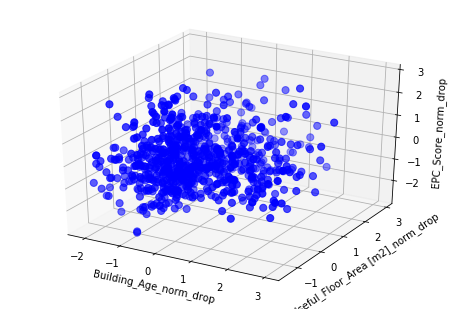

In [723]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r.iloc[:,0],r.iloc[:,1],r.iloc[:,2],s=50,c='b')
ax.set_xlabel(r.columns[0])
ax.set_ylabel(r.columns[1])
ax.set_zlabel(r.columns[2])
plt.show

### show all the distribution standard data 2D - 2index

<function matplotlib.pyplot.show(*args, **kw)>

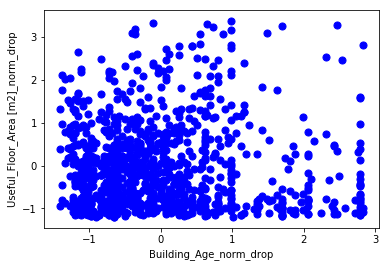

In [651]:
plt.figure()
plt.scatter(r.iloc[:,0],r.iloc[:,1],s=50,c='b')
plt.xlabel(r.columns[0])
plt.ylabel(r.columns[1])
#plt.set_zlabel('EPC_Score_Standardized')
plt.show

## Model Kmean for data standard 

### an example for one kmeans: 3 class 

In [724]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

model_kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)
label = model_kmean.fit(r)
model_kmean.cluster_centers_
model_kmean_predict1 = model_kmean.predict(r)
metrics.silhouette_score(r, label.labels_, metric='euclidean')

0.2752189078840229

#### figure 3D -3 features

<function matplotlib.pyplot.show(*args, **kw)>

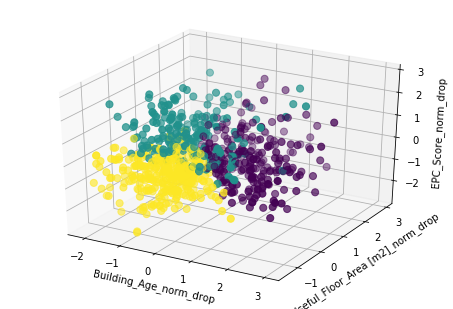

In [725]:
fig = plt.figure()
ax1 = Axes3D(fig)
ax1.scatter(r.iloc[:,0],r.iloc[:,1],r.iloc[:,2],c=model_kmean_predict1,s=50,cmap='viridis')
ax1.set_xlabel(r.columns[0])
ax1.set_ylabel(r.columns[1])
ax1.set_zlabel(r.columns[2])
#ax1.view_init(20, 0) #view
plt.show

#### figure 2D -2 features

<function matplotlib.pyplot.show(*args, **kw)>

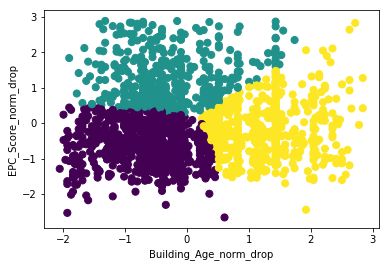

In [471]:
plt.figure
plt.scatter(r.iloc[:,0],r.iloc[:,1],c=model_kmean_predict1,s=50,cmap='viridis')
plt.xlabel(r.columns[0])
plt.ylabel(r.columns[1])
#plt.set_zlabel('EPC_Score_Standardized')
plt.show

### apply the 1-9 class 

In [728]:
from scipy.spatial.distance import cdist

distortions = []
centroid = []
evolution = []

cla = range(2,10)

for i in cla:
    model_kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=i, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)
    labels = model_kmean.fit(r)
    
    model_kmean_predict = model_kmean.predict(r)
    #centroids = model_kmean.cluster_centers_
    
    #Silhouette Coefficient¶
    evolution.append(metrics.silhouette_score(r, labels.labels_, metric='euclidean'))
    
    #centroid
    centroid.append(sum(model_kmean.cluster_centers_))
    
    #elbow
    distortions.append(sum(np.min(cdist(r, model_kmean.cluster_centers_, 'euclidean'), axis=1)) / r.shape[0])

### kmean's evolution 

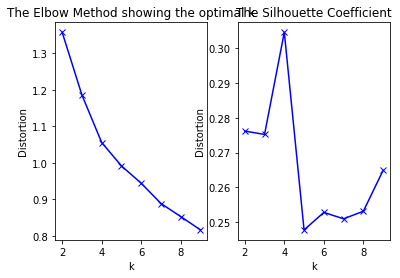

In [729]:
# Plot the elbow
plt.subplot(1,2,1)
plt.plot(cla, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
#plt.show()

# Plot the Silhouette Coefficient
plt.subplot(1,2,2)
plt.plot(cla, evolution, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Silhouette Coefficient')
plt.show()

## Model PCA for data standard 

In [558]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(r)
principalComponents
#principalDf = pd.DataFrame(data = principalComponents）
             #,columns = ['principal component 1', 'principal component 2'])

array([[ 0.43204756, -0.23143315, -0.52399793],
       [-0.5509514 , -0.55509025, -1.71723719],
       [-0.57960622,  0.37339975, -0.70914572],
       ...,
       [-1.52795423,  1.51971981,  2.49967948],
       [ 2.074279  ,  0.92339564,  0.53225967],
       [-0.26940995,  0.16247028, -0.80912651]])

In [559]:
principalDf.head()
principalDf.describe()

,principal component 1,principal component 2
count,1.787000e+03,1.787000e+03
mean,-2.161735e-16,4.543092e-17
std,1.037615e+00,9.948543e-01
min,-3.496135e+00,-3.009166e+00
25%,-7.053323e-01,-6.563365e-01
50%,8.239313e-03,3.767056e-03
75%,7.257326e-01,6.930914e-01
max,3.717313e+00,3.088864e+00


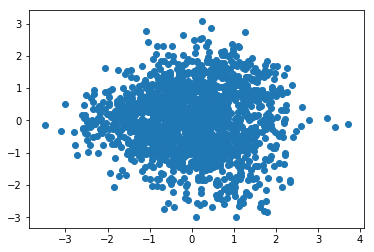

In [560]:
plt.figure
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1])
plt.show()

In [561]:
pca.explained_variance_ratio_

array([0.3586805 , 0.32972708, 0.31159242])